### Download Dataset


In [49]:
%%bash

if [[ ! -f "Clean_Dataset.csv" ]]; then
    curl -L -o dataset.zip\
    https://www.kaggle.com/api/v1/datasets/download/shubhambathwal/flight-price-prediction &&\
    unzip dataset.zip
    rm -f dataset.zip   business.csv economy.csv
fi


### Import required libraries


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

In [51]:
df = pd.read_csv("./Clean_Dataset.csv")

### Data Exploration


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [53]:
df = df.drop(columns=["Unnamed: 0"])

In [54]:
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [55]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


#### Price according to class


In [56]:
df["class"].unique()

array(['Economy', 'Business'], dtype=object)

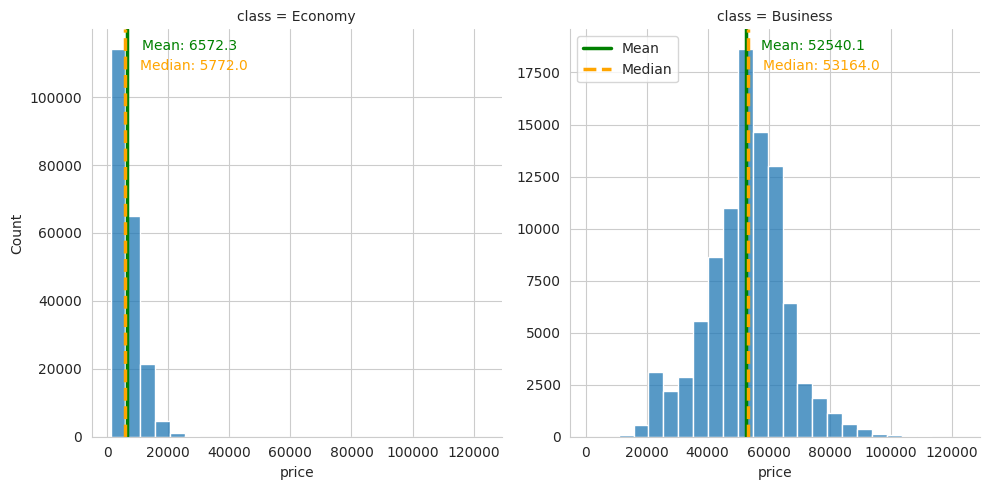

In [57]:
g = sns.displot(
    data=df,
    x="price",
    col="class",
    bins=25,
    facet_kws=dict(sharex=False, sharey=False),
)

axes = g.axes.flatten()

# iterate through each axes
for ax in axes:
    spec = ax.get_title().split(" = ")[1]

    data = df[df["class"] == spec]["price"]

    ax.axvline(x=data.mean(), c="g", ls="-", lw=2.5, label="Mean")
    ax.text(
        data.mean() + 5000,
        0.95,
        f"Mean: {round(data.mean(),1)}",
        color="green",
        transform=ax.get_xaxis_transform(),
    )
    ax.axvline(x=data.median(), c="orange", ls="--", lw=2.5, label="Median")
    ax.text(
        data.median() + 5000,
        0.90,
        f"Median: {round(data.median(),1)}",
        color="orange",
        transform=ax.get_xaxis_transform(),
    )
plt.legend()
plt.show()

#### Price comparision between different airlines

In [58]:
import matplotlib.ticker as plticker

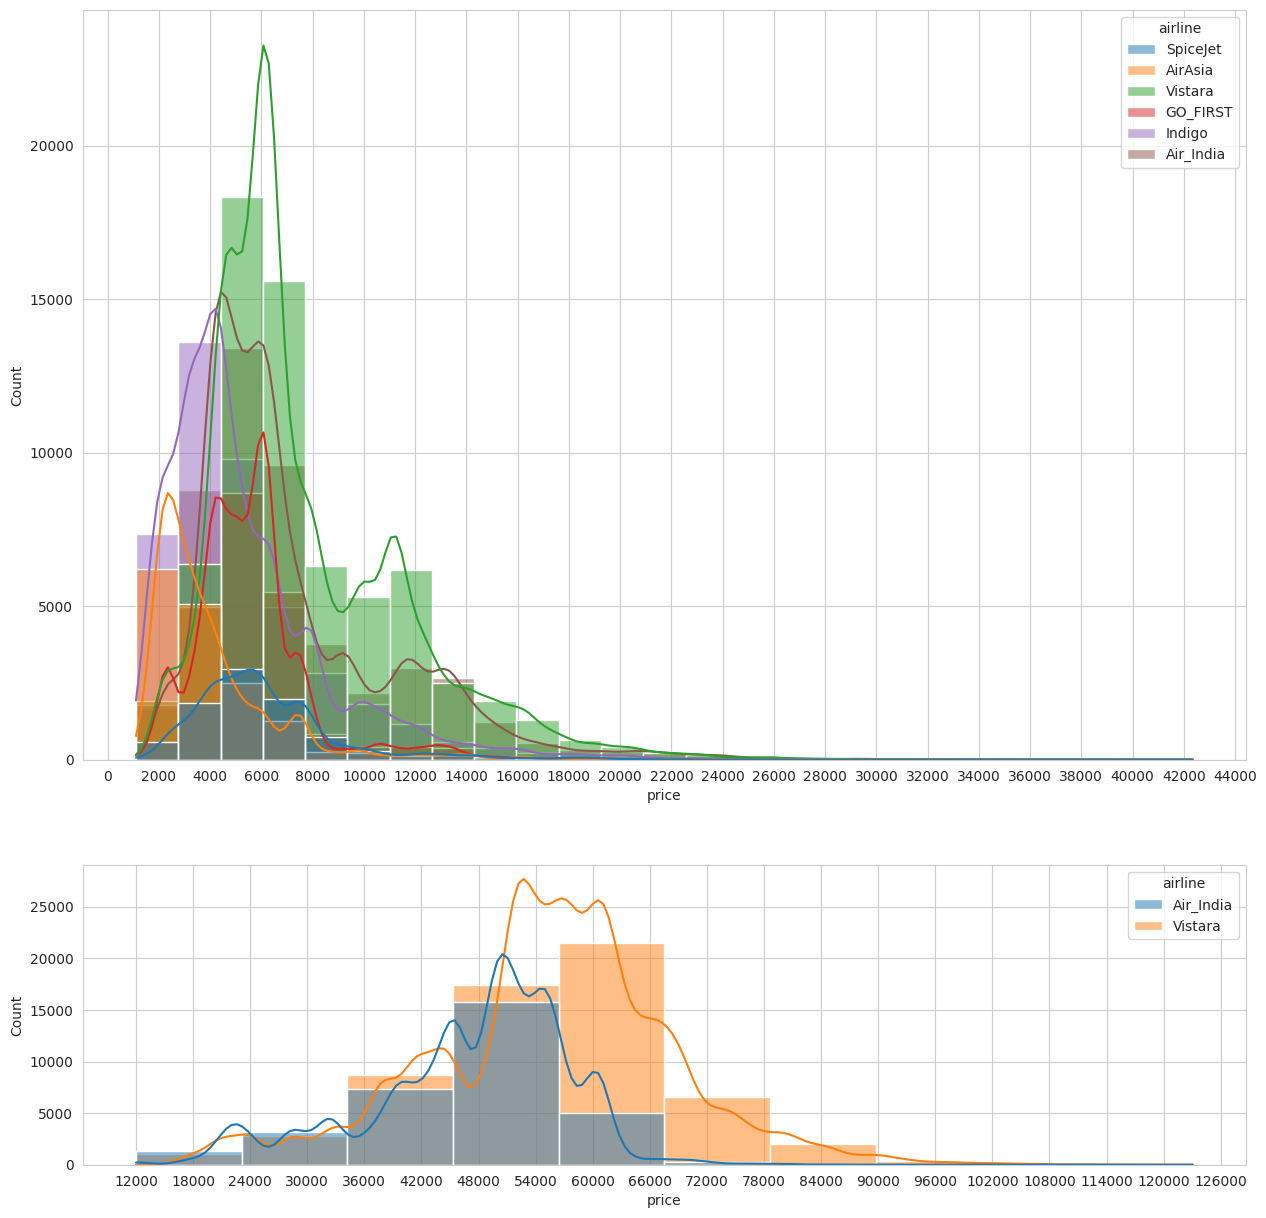

In [59]:
fig, axes = plt.subplots(
    2, 1, sharex=False, sharey=False, height_ratios=[5, 2], figsize=(15, 15)
)
sns.histplot(
    df[df["class"] == "Economy"],
    x="price",
    hue="airline",
    ax=axes[0],
    bins=25,
    kde=True,
)
sns.histplot(
    df[df["class"] == "Business"],
    x="price",
    hue="airline",
    ax=axes[1],
    bins=10,
    kde=True,
)
axes[0].xaxis.set_major_locator(plticker.MultipleLocator(2000))
axes[1].xaxis.set_major_locator(plticker.MultipleLocator(6000))

#### Price vs Number of days left

In [60]:
price_days_left_economy = (
    df[df["class"] == "Economy"]
    .groupby(["days_left", "airline"], as_index=False, sort=[True, True])["price"]
    .median()
)

In [61]:
price_days_left_business = (
    df[df["class"] == "Business"]
    .groupby(["days_left", "airline"], as_index=False, sort=[True, True])["price"]
    .median()
)

Text(6.5, 0.9, 'Prices jump 6 days \nbefore the flight')

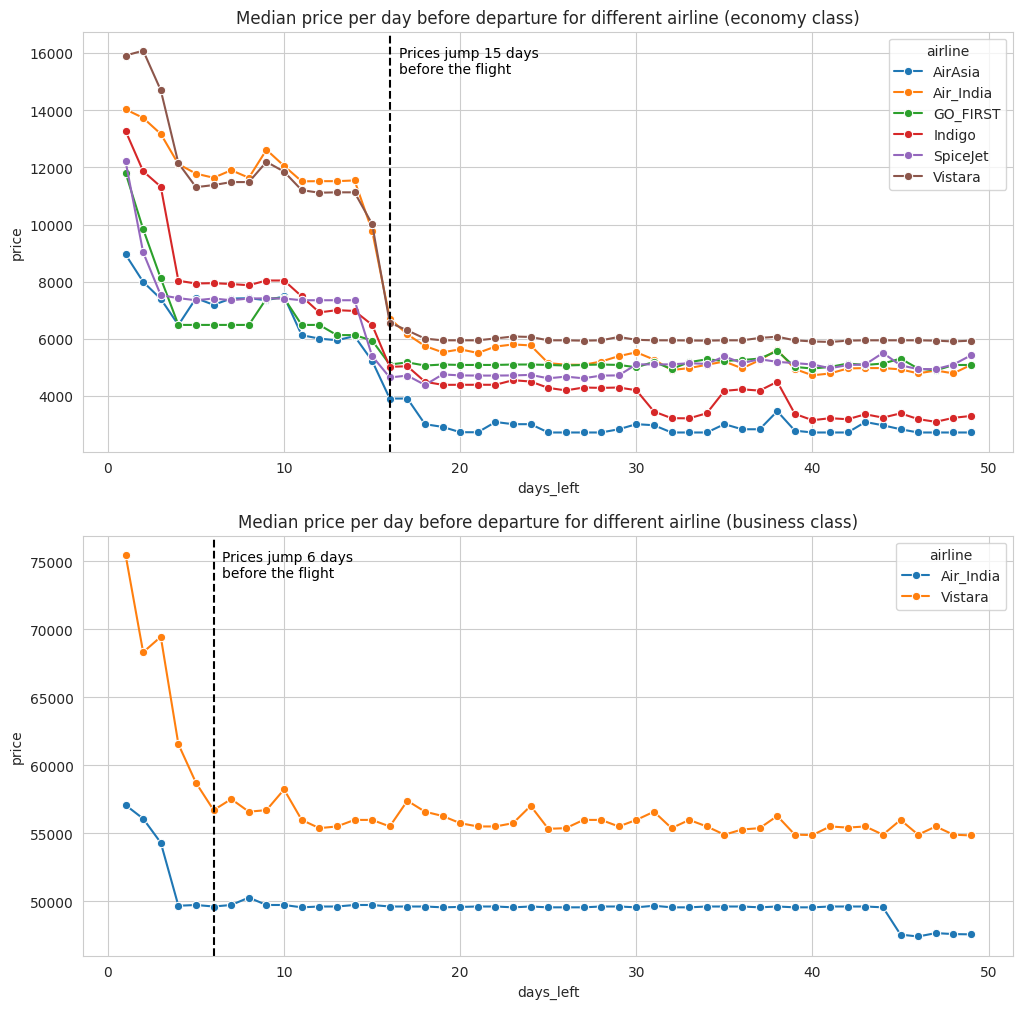

In [62]:
fig, axes = plt.subplots(2, 1, sharey=False, sharex=False, figsize=(12, 12))
sns.set_style("ticks")
sns.lineplot(
    data=price_days_left_economy,
    x="days_left",
    y="price",
    hue="airline",
    ax=axes[0],
    marker="o",
).set_title(
    "Median price per day before departure for different airline (economy class)"
)
axes[0].axvline(16, c="black", ls="--")
axes[0].text(
    16.5,
    0.90,
    f"Prices jump 15 days \nbefore the flight",
    color="black",
    transform=axes[0].get_xaxis_transform(),
)
sns.lineplot(
    data=price_days_left_business,
    x="days_left",
    y="price",
    hue="airline",
    ax=axes[1],
    marker="o",
).set_title(
    "Median price per day before departure for different airline (business class)"
)
axes[1].axvline(6, c="black", ls="--")
axes[1].text(
    6.5,
    0.90,
    f"Prices jump 6 days \nbefore the flight",
    color="black",
    transform=axes[1].get_xaxis_transform(),
)

### Predicting flight price

##### Convert categorical variables into indicator variables

In [63]:
dummies_variables = [
    "airline",
    "source_city",
    "destination_city",
    "departure_time",
    "arrival_time",
    "stops",
    "class",
]
dummies = pd.get_dummies(df[dummies_variables], dtype="int")
df = pd.concat([df, dummies], axis=1)

df = df.drop(
    [
        "flight",
        "airline",
        "source_city",
        "destination_city",
        "departure_time",
        "arrival_time",
        "stops",
        "class",
    ],
    axis=1,
)

In [64]:
df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,stops_one,stops_two_or_more,stops_zero,class_Business,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [65]:
correlation_matrix = df.corr()
correlation_matrix["price"].sort_values(key=lambda x: abs(x), ascending=False)

price                           1.000000
class_Business                  0.937860
class_Economy                  -0.937860
airline_Vistara                 0.360816
airline_Indigo                 -0.280882
duration                        0.204222
stops_one                       0.199913
airline_GO_FIRST               -0.194179
stops_zero                     -0.187277
airline_AirAsia                -0.176188
airline_SpiceJet               -0.114019
arrival_time_Late_Night        -0.093602
days_left                      -0.091949
airline_Air_India               0.070041
stops_two_or_more              -0.064248
arrival_time_Early_Morning     -0.060449
arrival_time_Evening            0.056408
destination_city_Delhi         -0.052527
departure_time_Afternoon       -0.051968
source_city_Delhi              -0.043282
departure_time_Night            0.041768
arrival_time_Afternoon         -0.040258
departure_time_Late_Night      -0.033768
arrival_time_Morning            0.030379
destination_city

### Variable Selection

In [66]:
x = df.drop(columns=["price"])
y = df["price"]

Standardize non-binary variables like duration and days left

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [("somename", StandardScaler(), ["duration", "days_left"])], remainder="passthrough"
)

x_scaled = ct.fit_transform(x)

#### Using LASSO regression for feature selection

In [68]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

best_lasso_model = LassoCV(cv=10, random_state=40)
best_lasso_model.fit(x_scaled, y)

LassoCV(cv=10, random_state=40)

In [69]:
# Display variables having non-zero coefficients
x.iloc[:, best_lasso_model.coef_ != 0].columns.tolist()

['duration',
 'days_left',
 'airline_AirAsia',
 'airline_Air_India',
 'airline_Vistara',
 'source_city_Delhi',
 'source_city_Hyderabad',
 'source_city_Kolkata',
 'destination_city_Delhi',
 'destination_city_Hyderabad',
 'destination_city_Kolkata',
 'departure_time_Afternoon',
 'departure_time_Morning',
 'arrival_time_Afternoon',
 'arrival_time_Early_Morning',
 'arrival_time_Evening',
 'arrival_time_Night',
 'stops_two_or_more',
 'stops_zero',
 'class_Business']

In [70]:
select_best_features = SelectFromModel(best_lasso_model, prefit=True)
x_best = select_best_features.transform(x_scaled)
x_best.shape

(300153, 20)

### Split data into training and testing set

In [71]:
x_train, x_test, y_train, y_test = train_test_split(
    x_best, y, test_size=0.25, random_state=74
)

In [72]:
from typing import TypedDict, List


class ModelResults(TypedDict):
    model_name: str
    r2_score: float
    mse: float

# Capture metrics of various models
model_results: List[ModelResults] = []

# Capture predictions and residuals of various models on testing dataset
preds = pd.DataFrame({"y_true": y_test})




#### Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
linear_reg = LinearRegression().fit(x_train, y_train)
linear_reg_pred = linear_reg.predict(x_test)
model_results.append(
        {
            "model_name": "Linear Regression",
            "r2_score": r2_score(y_test, linear_reg_pred),
            "mse": mean_squared_error(y_test, linear_reg_pred),
        }
    )

In [75]:
model_results[0]

{'model_name': 'Linear Regression',
 'r2_score': 0.9116959185606882,
 'mse': 45599869.80348507}

Text(0.5, 1.0, 'Residual plot of Linear Regression')

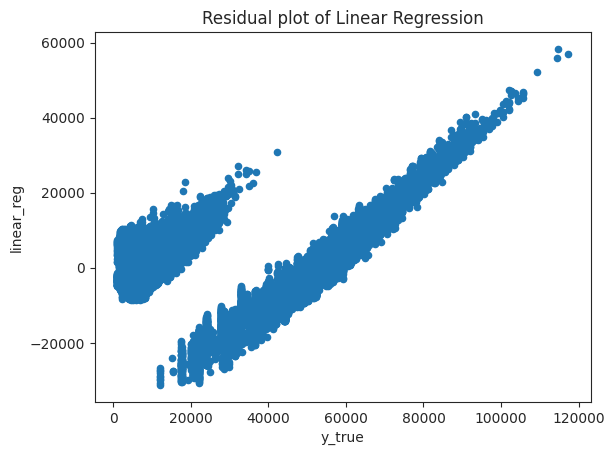

In [76]:
preds["linear_reg"] = preds["y_true"] - linear_reg_pred
preds.plot(x="y_true", y="linear_reg",kind="scatter")
plt.title("Residual plot of Linear Regression")


### Support Vector Machines - Regression

Use Grid Search to find out the best parameters for SVM

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

grid_search_parameters = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
}

svr = LinearSVR()
grid_search = GridSearchCV(
    svr, grid_search_parameters, scoring="neg_mean_squared_error", cv=8, verbose=2
)
grid_search.fit(x_train,y_train)

Fitting 8 folds for each of 6 candidates, totalling 48 fits
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END ........................................

GridSearchCV(cv=8, estimator=LinearSVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [78]:
linear_svr_pred = grid_search.best_estimator_.predict(x_test)
model_results.append(
        {
            "model_name": "Linear SVM",
            "r2_score": r2_score(y_test, linear_svr_pred),
            "mse": mean_squared_error(y_test, linear_svr_pred),
        }
    )

In [79]:
model_results[-1]

{'model_name': 'Linear SVM',
 'r2_score': 0.9024315055885663,
 'mse': 50383975.11830919}

Text(0.5, 1.0, 'Residual plot of Linear SVM')

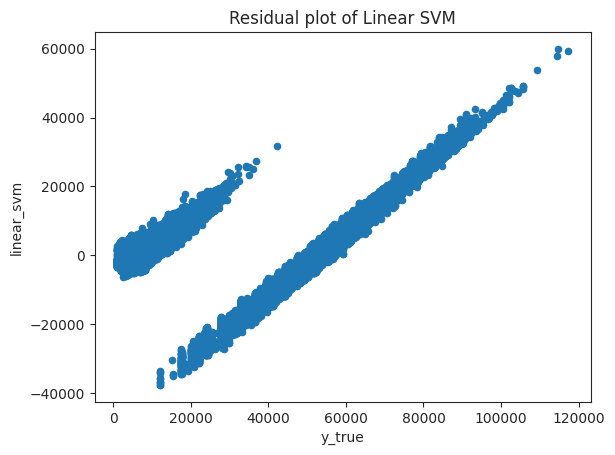

In [80]:
preds["linear_svm"] = preds["y_true"] - linear_svr_pred
preds.plot(x="y_true", y="linear_svm",kind="scatter")
plt.title("Residual plot of Linear SVM")

### Decision Tree Regression

In [81]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(min_samples_leaf=20,max_features="sqrt")
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_features='sqrt', min_samples_leaf=20)

In [82]:
decision_tree_pred = decision_tree.predict(x_test)
model_results.append(
        {
            "model_name": "Decision Tree",
            "r2_score": r2_score(y_test, decision_tree_pred),
            "mse": mean_squared_error(y_test, decision_tree_pred),
        }
    )

In [83]:
model_results[-1]

{'model_name': 'Decision Tree',
 'r2_score': 0.965970618659403,
 'mse': 17572634.620414633}

Text(0.5, 1.0, 'Residual plot of decision tree regressor')

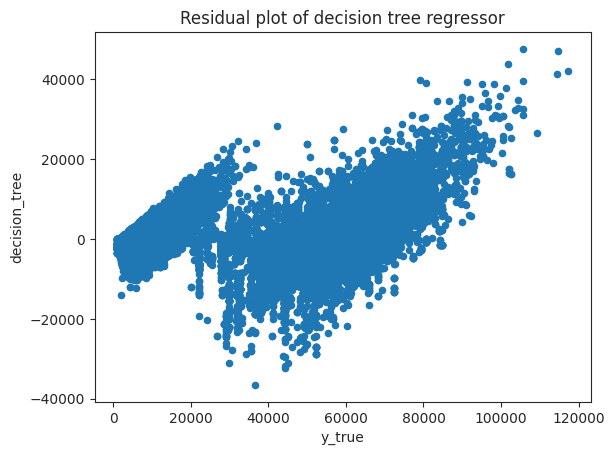

In [84]:
preds["decision_tree"] = preds["y_true"] - decision_tree_pred
preds.plot(x="y_true", y="decision_tree",kind="scatter")
plt.title("Residual plot of decision tree regressor")

#### Random Forest Regresor

In [85]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(
    n_estimators=500, min_samples_leaf=15, max_features="sqrt", n_jobs=-1
)
random_forest.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=15,
                      n_estimators=500, n_jobs=-1)

In [86]:
random_forest_pred = random_forest.predict(x_test)
model_results.append({
    "model_name": "Random Forest",
    "mse": mean_squared_error(y_test, random_forest_pred),
    "r2_score": r2_score(y_test, random_forest_pred)
})
model_results[-1]

{'model_name': 'Random Forest',
 'mse': 15140445.487292493,
 'r2_score': 0.9706805493722012}

Text(0.5, 1.0, 'Residual plot of random forest regressor')

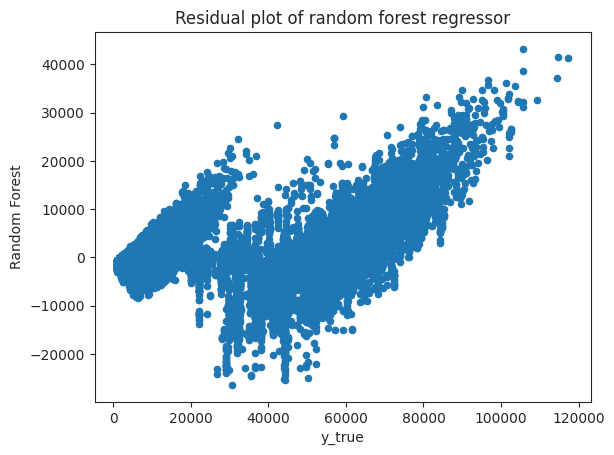

In [87]:
preds["Random Forest"] = preds["y_true"] - random_forest_pred
preds.plot(x="y_true", y="Random Forest",kind="scatter")
plt.title("Residual plot of random forest regressor")

### Using XGBoost

In [88]:
import xgboost as xgb

In [89]:
gradient_boosting = xgb.XGBRegressor(
    n_estimators=500,
    n_jobs=-1,
    tree_method="hist",
    early_stopping_rounds=2,
)

gradient_boosting.fit(X=x_train, y=y_train, eval_set=[(x_test, y_test)])

[0]	validation_0-rmse:16358.16937
[1]	validation_0-rmse:12037.57845
[2]	validation_0-rmse:9175.18161
[3]	validation_0-rmse:7366.69502
[4]	validation_0-rmse:6258.81985
[5]	validation_0-rmse:5619.52996
[6]	validation_0-rmse:5244.50388
[7]	validation_0-rmse:5023.10796
[8]	validation_0-rmse:4891.22130
[9]	validation_0-rmse:4791.98741
[10]	validation_0-rmse:4743.07176
[11]	validation_0-rmse:4709.25803
[12]	validation_0-rmse:4670.19777
[13]	validation_0-rmse:4649.43586
[14]	validation_0-rmse:4628.42612
[15]	validation_0-rmse:4596.09118
[16]	validation_0-rmse:4576.78775
[17]	validation_0-rmse:4558.26162
[18]	validation_0-rmse:4544.72838
[19]	validation_0-rmse:4539.41391
[20]	validation_0-rmse:4528.91085
[21]	validation_0-rmse:4510.31172
[22]	validation_0-rmse:4503.89259
[23]	validation_0-rmse:4486.42680
[24]	validation_0-rmse:4465.92132
[25]	validation_0-rmse:4447.03175
[26]	validation_0-rmse:4408.10574
[27]	validation_0-rmse:4400.03561
[28]	validation_0-rmse:4389.52864
[29]	validation_0-rmse

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=2,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [90]:
gradient_boosting_pred = gradient_boosting.predict(x_test)
model_results.append({
    "model_name": "Gradient Boosting",
    "mse": mean_squared_error(y_test, gradient_boosting_pred),
    "r2_score": r2_score(y_test, gradient_boosting_pred)
})
model_results[-1]

{'model_name': 'Gradient Boosting',
 'mse': 10840676.0,
 'r2_score': 0.9790070652961731}

Text(0.5, 1.0, 'Residual plot of Gradient Boosting regressor')

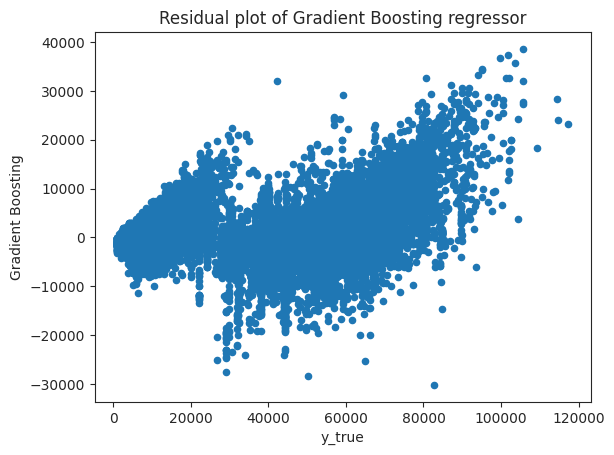

In [91]:
preds["Gradient Boosting"] = preds["y_true"] - gradient_boosting_pred
preds.plot(x="y_true", y="Gradient Boosting",kind="scatter")
plt.title("Residual plot of Gradient Boosting regressor")

Considering residual plots on testing data set of all models, random tree forest model and gradient boosting models seems to be the best

### Comparing models

In [92]:
compare = pd.DataFrame(model_results)
compare.head(10)

,model_name,r2_score,mse
0,Linear Regression,0.911696,4.559987e+07
1,Linear SVM,0.902432,5.038398e+07
2,Decision Tree,0.965971,1.757263e+07
3,Random Forest,0.970681,1.514045e+07
4,Gradient Boosting,0.979007,1.084068e+07


The R2 score of random forest model and gradient boosting models is similar but there is a difference in MSE.  
Hence, gradient boosting is the best model to predict prices of flights.